**Цели:**
- повторить понятия матрицы перехода и матрицы поворота, свойства
- решить прямую и обратную задачи кинематики для разных механических систем




## **Матрица поворота (Rotation Matrix)**

Матрица поворота (или матрица напрявляющих косинусов)-ортогональная матрица, которая используется для выполнения собственного ортогонального преобразования в евклидовом пространстве.

- для трехмерного пространства столбцы в матрице поворота являются проекциями ортов новой системы координат относительно старой ситемы координат

Для того, чтобы повернуть вектор на угол $\alpha$ против часовой стрелки, можно умножить матрицу поворота на него:

Пример:
\begin{equation}
\begin{bmatrix}
x_1 \\ y_1 \\ z_1 \\
\end{bmatrix} =
\begin{bmatrix}
R_{11} & R_{12} & R_{13} \\
R_{21} & R_{22} & R_{23} \\
R_{31} & R_{32} & R_{33} \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\ y_0 \\ z_0 \\
\end{bmatrix}
\end{equation}

**Свойства матрицы поворота:**
- матрица $\mathbf{R}$ является ортогональной ($\mathbf{R}\mathbf{R}^T=\mathbf{R}^T\mathbf{R}=\mathbf{E} ⇒ \mathbf{R}^{-1}=\mathbf{R}^T$)
- векторы, образованные столбцами в матрице пехода являются ортонормальными (т.е. модуль каждого вектора равна единице и они попарно ортогональны)


## **Матрицы перехода (Transformation matrix)**

В однородных трехмерных координатах используются матрицы однородных преобразований (Homogenous transformation).

Матрицы поворота (Rotation matrix) относительно осей $x,y,z$ на угол $\alpha$:
\begin{equation}
\mathbf{Rot}_x(\alpha) = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & \cos(\alpha) & - \sin(\alpha) & 0 \\
0 & \sin(\alpha) & \cos(\alpha) & 0 \\
0 & 0 & 0 & 1\\
\end{bmatrix} \quad
\mathbf{Rot}_y(\alpha) = \begin{bmatrix}
\cos(\alpha) & 0 &  \sin(\alpha) & 0\\
0 & 1 & 0 & 0 \\
-\sin(\alpha) & 0 & \cos(\alpha) & 0 \\
0 & 0 & 0 & 1\\
\end{bmatrix} \quad
\mathbf{Rot}_z(\alpha) = \begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & 0 & 0\\
\sin(\alpha) & \cos(\alpha) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1\\
\end{bmatrix}
\end{equation}









Матрицы трансляции (Translation matrix) вдоль осей $x,y,z$:
\begin{equation}
\mathbf{T}_x(d) = \begin{bmatrix}
1 & 0 &  0 & d\\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1\\
\end{bmatrix} \quad
\mathbf{T}_y(d) = \begin{bmatrix}
1 & 0 &  0 & 0\\
0 & 1 & 0 & d \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1\\
\end{bmatrix} \quad
\mathbf{T}_z(d) = \begin{bmatrix}
1 & 0 &  0 & 0\\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d \\
0 & 0 & 0 & 1\\
\end{bmatrix}
\end{equation}


Свойства матрицы однородных преобразований:
- матрица $\mathbf{R}$ является ортогональной ($\mathbf{R}\mathbf{R}^T=\mathbf{R}^T\mathbf{R}=\mathbf{E} ⇒ \mathbf{R}^{-1}=\mathbf{R}^T$)
- [$\mathbf{x}$, $\mathbf{y}$, $\mathbf{z}$] являются ортонормальными (т.е. модуль каждого вектора равна единице и они попарно ортогональны)
- матрица $\mathbf{R}$ задает ориентацию объекта в пространстве
- вектор $\mathbf{t}$ задает положение объекта в пространстве


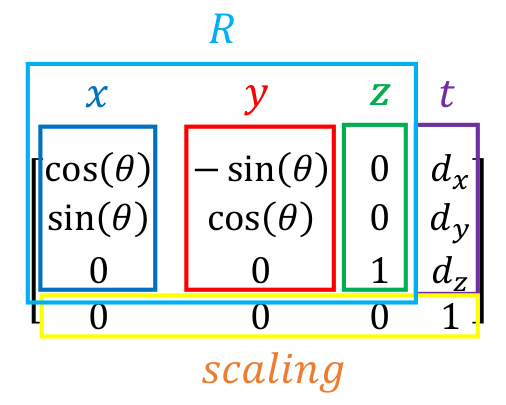

In [1]:
import numpy as np
def Rz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0],
                  [np.sin(q),  np.cos(q), 0],
                  [        0,          0, 1]], dtype=float)
    return T

v0 = np.array([2,0,0])

M = Rz(np.pi/2)
v1 = M @ v0.T
print(v1)

[1.2246468e-16 2.0000000e+00 0.0000000e+00]


## **3-х звенный плоский манипулятор**


### *Прямая кинематика*

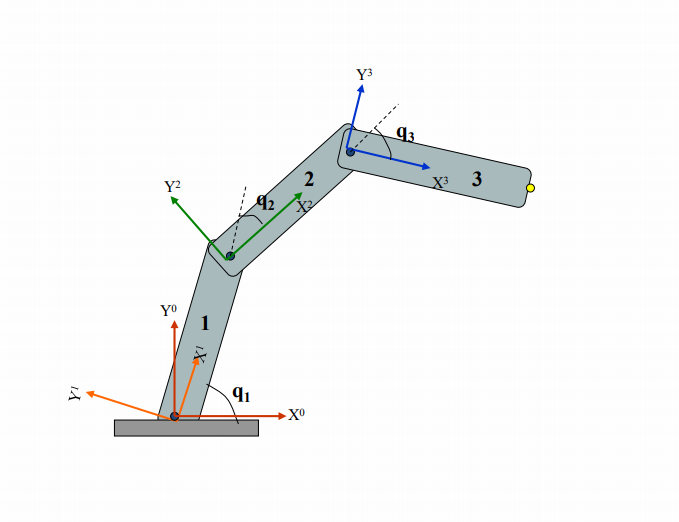

Положение и ориентация рабочего органа (end-effector) зписывается следующим образом:

\begin{equation}
x =  l_1 \cos(q_1) + l_2 \cos(q_1 + q_2) + l_3 \cos(q_1 + q_2 + q_3) \\
y =  l_1 \sin(q_1) + l_2 \sin(q_1 + q_2) + l_3 \sin(q_1 + q_2 + q_3) \\
\varphi = q_1 + q_2 + q_3
\end{equation}

In [2]:
# robot parameters
l1, l2, l3 = 1, 1, 1
q1, q2, q3 = 0, 0, 0
q = [q1, q2, q3]

In [3]:
from numpy import array, sin, cos, pi,sqrt

def FK(q):
  q1, q2, q3 = q
  x = l1*cos(q1) + l2*cos(q1+q2) + l3*cos(q1+q2+q3)
  y = l1*sin(q1) + l2*sin(q1+q2) + l3*sin(q1+q2+q3)
  phi = q1+q2+q3
  return [x, y, phi]

In [4]:
pos = FK(q)
print('x:', pos[0])
print('y:', pos[1])
print('phi:', pos[2])

x: 3.0
y: 0.0
phi: 0


In [5]:
from matplotlib.pyplot import subplots, plot, Circle, xlim, ylim, title, grid, show


def get_points(q):
  q1, q2, q3 = q

  joint0_x = 0
  joint0_y = 0

  joint1_x = l1*cos(q1)
  joint1_y = l1*sin(q1)

  joint2_x = joint1_x + l2*cos(q1+q2)
  joint2_y = joint1_y + l2*sin(q1+q2)

  joint3_x, joint3_y, _ = FK(q)

  points = [[joint0_x, joint1_x, joint2_x, joint3_x],
            [joint0_y, joint1_y, joint2_y, joint3_y]]
  return points


def plot_robot(points):

  fig, axes = subplots(figsize=(5,5))
  plot(points[0], points[1], linewidth=3., alpha = 0.7, color='b')

  for i in range(0,len(points[0])):
    cir = Circle((points[0][i], points[1][i]), 0.1, color='r')
    axes.set_aspect(1)
    axes.add_artist(cir)

  xlim([-3.5,3.5])
  ylim([-3.5,3.5])

  title("Manipulator configuration at joint positions: {} ".format(q), fontsize=16)
  grid(color='black', linestyle='--', linewidth=0.7, alpha = 0.7)
  show()


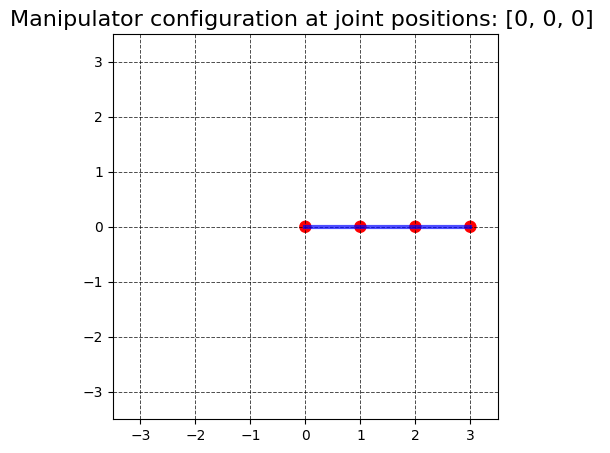

In [6]:
points = get_points(q)
plot_robot(points)

Задание 1. Нарисуйте конфигурацию робота при значениях $q=[\pi/12, \pi/3, \pi/6]$. Выведите значения $x, y, \varphi$.

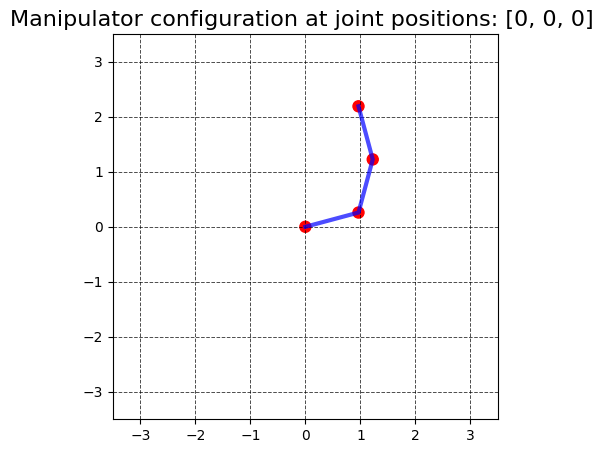

In [7]:
new_q = np.array([np.pi/12, np.pi/ 3, np.pi/6])
points = get_points(new_q)
plot_robot(points)

Задание 2. Перепишите функцию `FK(q)`, используя матрицы перехода $\mathbf{Rot}_i(\alpha)$ и $\mathbf{T}_i(d)$. Убедитесь, что полученные результаты совпадают с исходным способом.

In [8]:
def Rotz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0, 0],
                  [np.sin(q),  np.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]], dtype=float)
    return T

def Transx(l):
    T = np.array([[1, 0, 0, l],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T



def FK_n(q):

  point1 = Rotz(q[0]) @ Transx(l1) @ Rotz(q[1]) @ Transx(l2) @ Rotz(q[2]) @ Transx(l3) # First we rotate the frame relative to previous position then we move along the link by its length l_I

  x, y= point1[:2, 3]
  phi = q[0]+q[1]+q[2]

  return [x, y, phi]

In [9]:
print(FK(q))
print(FK_n(q))

[3.0, 0.0, 0]
[3.0, 0.0, 0]


### *Обратная кинематика*

Попробуем решить обратную задачу кинематики. При заданных значениях положения и ориентации захвата манипулятора найдем конфигурацию, то есть набор углов $q_1, q_2, q_3$ удовлетвряющий условиям задачи.


...


Задание 3. Напишите функцию `IK(pos)` для решения обратной задачи кинематики. (pos - координаты захвата манипулятора).

Задание 4. Сгенерруйте 100 случайных наборов обобщенных координат и проверьте корректность вычислений функции `IK(pos)`.



In [15]:
def IK(pos):
  x, y, phi = pos
  x, y = x - l3 * np.cos(phi), y - l3 * np.sin(phi) # the position of 3rd link is determined by the angle of the end effector, so we always know it
  r = np.sqrt(x**2 +y**2) # get the hypothenuse of the 2 links
  alpha = np.arccos((l1**2+l2**2 -r**2)/(2*l1*l2))
  q2 = np.pi - alpha
  l2_sin_q2 = l2 * np.sin(q2) #to find the beta angle trough the atan2
  traced_length_l1 = l1+l2*np.cos(q2)
  beta = np.arctan2(l2_sin_q2, traced_length_l1)
  gamma = np.arctan2(y, x)
  q1 = gamma - beta
  q3 = phi-q1-q2
  return q1, q2, q3

In [18]:
pos_q = new_q
print(f"Given the initial q:{pos_q}")
print(f"FK result(end effector position):{FK(pos_q)}")
print(f"IK result(position of joints from end effector):{IK(FK(pos_q))}")

IK(FK(new_q))

Given the initial q:[0.26179939 1.04719755 0.52359878]
FK result(end effector position):[0.965925826289069, 2.190670697680657, 1.8325957145940457]
IK result(position of joints from end effector):(0.26179938779914913, 1.0471975511965979, 0.5235987755982987)


(0.26179938779914913, 1.0471975511965979, 0.5235987755982987)

TODO: Задание 4 + проверка двух углов?

## **Шестиосевой робот манипулятор (6 DoF manipulator)**

Кинематическая схема робота FANUC R-2000iC - 165F

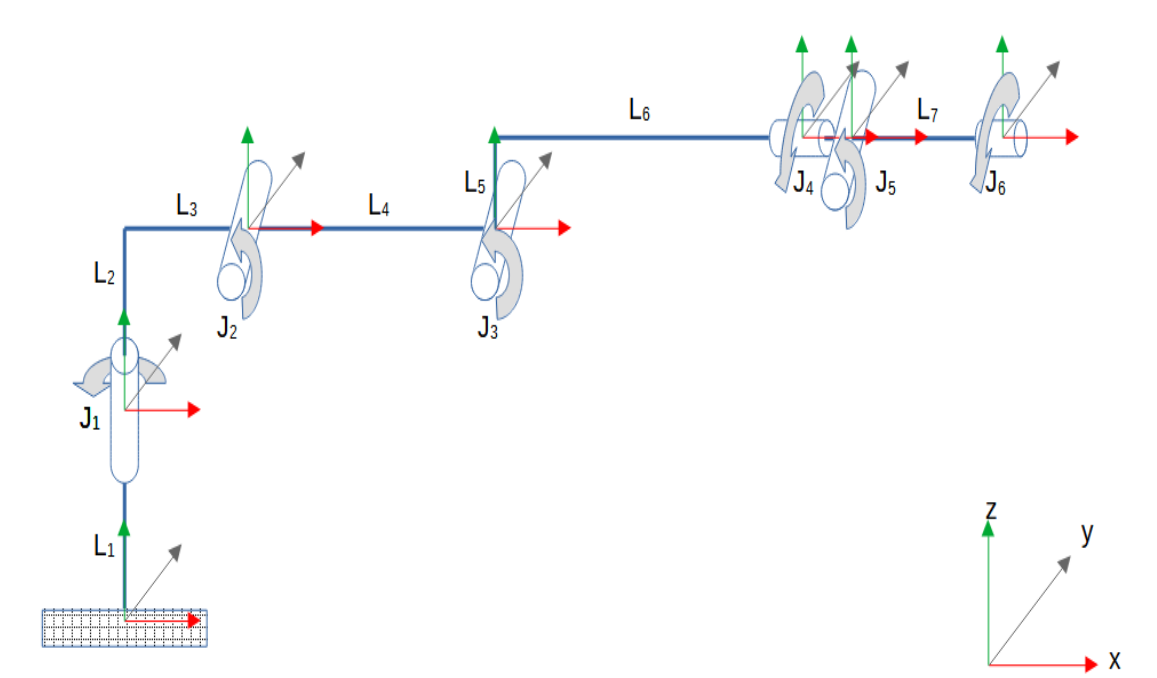

Прямая кинематика (в общем случае) выглядит следующим образом:

\begin{equation}
T^0_6  = T^0_1 . T^1_2 . T^2_3 . T^3_4 . T^4_5 . T^5_6
\end{equation}

In [ ]:
def Rx(q):
    T = np.array([[1,         0,          0, 0],
                  [0, np.cos(q), -np.sin(q), 0],
                  [0, np.sin(q),  np.cos(q), 0],
                  [0,         0,          0, 1]], dtype=float)
    return T


def Ry(q):
    T = np.array([[ np.cos(q), 0, np.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-np.sin(q), 0, np.cos(q), 0],
                  [         0, 0,         0, 1]], dtype=float)
    return T


def Rz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0, 0],
                  [np.sin(q),  np.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]], dtype=float)
    return T


def Tx(x):
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Ty(y):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]], dtype=float)
    return T


def Tz(z):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]], dtype=float)
    return T

In [ ]:
# robot parameters, links (m)
l1 = 0.346
l2 = 0.324
l3 = 0.312
l4 = 1.075
l5 = 0.225
l6 = 1.280
l7 = 0.215

q = [0,0,0,0,0,0]

Задание 5. Напишите функцию `FK(q)` для 6-осевого робота.

In [ ]:
def FK(q):

  return None

### **Обратная кинематика**
Для решения обратной кинематики используется метод Пипера. Обратная задача кинематики может быть разделена на две независимые подзадачи. Найдем сначала углы $q_1,q_2,q_3$.

Задание 6. Напишите фнункцию `IK(T)` для 6-осевого робота.

In [ ]:
def IK(T):
  return None

Углы $q_1, q_2, q_3$ найдены. Теперь найдем углы $q_4, q_5, q_6$. Последние три шарнира вращаются в последовательности XYX. Воспользуемся формулами для нахождения углов $q_4, q_5, q_6$ https://en.wikipedia.org/wiki/Euler_angles (раздел Rotation Matrix)

In [ ]:
from sympy import sin, cos, symbols, lambdify, Matrix
import sympy as sp
import numpy as np
q4 = symbols('q4')
q5 = symbols('q5')
q6 = symbols('q6')

def Rx_sym(q):
    T = np.array([[1,         0,          0, 0],
                  [0, sp.cos(q), -sp.sin(q), 0],
                  [0, sp.sin(q),  sp.cos(q), 0],
                  [0,         0,          0, 1]])
    return T


def Ry_sym(q):
    T = np.array([[ sp.cos(q), 0, sp.sin(q), 0],
                  [         0, 1,         0, 0],
                  [-sp.sin(q), 0, sp.cos(q), 0],
                  [         0, 0,         0, 1]])
    return T

print(Rx_sym(q4)@Ry_sym(q5)@Rx_sym(q6))

[[cos(q5) sin(q5)*sin(q6) sin(q5)*cos(q6) 0]
 [sin(q4)*sin(q5) -sin(q4)*sin(q6)*cos(q5) + cos(q4)*cos(q6)
  -sin(q4)*cos(q5)*cos(q6) - sin(q6)*cos(q4) 0]
 [-sin(q5)*cos(q4) sin(q4)*cos(q6) + sin(q6)*cos(q4)*cos(q5)
  -sin(q4)*sin(q6) + cos(q4)*cos(q5)*cos(q6) 0]
 [0 0 0 1]]


Задание 7*. Сгенерируйте 100 случайных матриц перехода и решите обратную задачу кинематики. Сделайте проверку решения функции IK(T).